# Nonlinear and gradient decent

Dealing with the task of fitting a nonlinear equation to a dataset leads to a system of nonlinear equations.
This way, the well-known closed form least-squares solution is not suitable for this case.

The general theory of nonlinear regression assumes that the fitting function takes the general form

$ f(x) = f(x, \theta) $

where the fitting coefficients $\theta \in \mathbb{R}^p$ are used to minimize the error, and it is also assumed that $ p < N $, where $N$ is the number of samples, and $p$ is the model's number of parameters.
The root mean square error is given by
$$
    E_2(\theta) = \sum_{k=1}^N \left( f(x_k, \theta) - y_k \right)^2.
$$

The root mean square error can be minimized by applying the partial derivative of $E_2(\theta)$ with respect to each parameter $\theta_i$, that is,
$$
    \frac{\partial E_2(\theta)}{\partial\theta_i} = 0 \quad \text{with}\quad i = 0, 1, \dots, p.
$$

In general, this leads to a set of nonlinear equations, as follows
$$
    \sum_{k=1}^N \left( f(x_k, \theta) - y_k \right) \frac{\partial f }{\partial\theta_i} = 0 \quad \text{with}\quad i = 0, 1, \dots, p.
$$

There are no general methods available for solving such nonlinear systems.
In fact, nonlinear systems may have no solution, may have several solutions, or may have infinite solutions.
In general, iterative schemes are used to solve nonlinear systems, which require a good initial guess to converge to the global minimum error.

## Gradient descent

Gradient descent, or steepest descent, is a generic optimization algorithm to find optimal solutions to a wide range of problems.
The idea is to tweak parameters iteratively in order to minimize a cost function.

The gradient must be zero at an extremum, for high-dimensional systems, so,
$$
    \nabla f(x) = 0.
$$

The idea is to use the derivative information to as the basis of an iterative algorithm that progressively converges to
a local minimum point of $f(x)$.
The algorithm consists of obtaining the next point of the iteration by following the steepest descent, that is,
$$
    x_{x+1} = x_k - \gamma \nabla f(x_k), \quad k \geq 0,
$$
where $\gamma$ is the step size dictating how far to move along the gradient descent curve.
The term $\gamma \nabla f(x_k)$ is subtracted from $x_k$ in order to move against the gradient, this way, moving toward the local minimum.

It is worth to mention that the choice of the initial guess, $x_0$, and the step size $\gamma$ are crucial in order to achieve the cost function's global minimum.
The step size $\gamma$ may be kept constant or updated at each iteration, for example.
While the initial guess may be suggested by the user or one may use a grid search to find a good candidate, for example.

#### Example using the mean square error cost function

In order to implement the gradient descent we need to compute the gradient of the cost function with regards to each model parameter.
The $\text{MSE}(\theta)$ cost function is given by
$$
    \text{MSE}(\theta) = \frac{1}{N} \sum_{i=1}^N \left( \theta^T x^{(i)} - y^{(i)} \right),
$$
where $x^{(i)}$ is the $i$-th column of the output matrix $X$, $y^{(i)}$ is the $i$-th sample of the target vector, and $N$ is the number of samples.

The partial derivative of the above cost function is given by
$$
    \frac{\partial}{\partial \theta_j} \text{MSE}(\theta) = \frac{2}{N} \sum_{i=1}^N \left( \theta^T x^{(i)} - y^{(i)} \right)x^{(i)}_j.
$$

Instead of computing each partial derivative individually, we compute them all at once, which gives the following gradient vector
$$
    \nabla \text{MSE}(\theta) =
    \begin{bmatrix}
        \frac{\partial}{\partial \theta_0} \text{MSE}(\theta) \\
        \frac{\partial}{\partial \theta_1} \text{MSE}(\theta) \\
        \vdots \\
        \frac{\partial}{\partial \theta_p} \text{MSE}(\theta)
    \end{bmatrix}
    = \frac{2}{N} X^T \left( X\theta - y \right)
$$

Now, we can compute the gradient descent step as
$$
    \hat\theta_{k+1} = \hat\theta_k - \gamma\nabla\text{MSE}(\hat\theta_k),
$$
where $\gamma$ is the step size of the decrement, also known as the learning rate.

The following example shows an implementation of this algorithm using Python.

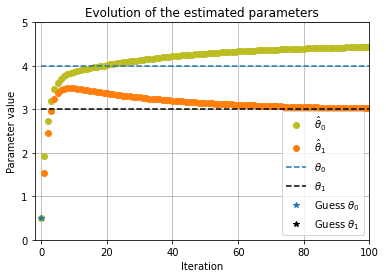

Initial guess: [ 0.49671415 -0.1382643 ]
Final estimate: [4.483871501545815, 2.977902451275972]


In [1]:
%matplotlib inline
import sys
from pathlib import Path
module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)
import numpy as np
import matplotlib.pyplot as plt
from main.supervised_learning.gradient_descent import gradient_descent
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
grad_descent = gradient_descent.GradientDescent()

# Generating the data
N = 100                     # number of data points
n_iterations = 1000
x = 2*np.random.rand(N,1)
eta = np.random.rand(N,1)
y = 4 + 3*x + eta
Xb = np.c_[np.ones((N,1)), x]

# Parameters' estimate
theta, theta_ev = grad_descent.gradient_descent(Xb, y,
    number_iterations=n_iterations)

# Data visualization
t = range(n_iterations)
plt.plot(t, theta_ev[0,0:n_iterations], 'o',
    c=mcolors.TABLEAU_COLORS.get('tab:olive'), label='$\hat\\theta_0$')
plt.plot(t, theta_ev[1,0:n_iterations], 'o', 
    c=mcolors.TABLEAU_COLORS.get('tab:orange'), label='$\hat\\theta_1$')
plt.plot(t, np.ones((n_iterations,1)).dot(4), '--',
    c=mcolors.TABLEAU_COLORS.get('tab:blue'), label='$\\theta_0$')
plt.plot(t, np.ones((n_iterations,1)).dot(3), '--',
    c='black', label='$\\theta_1$')
plt.plot(0, theta_ev[0,0], '*',
    c=mcolors.TABLEAU_COLORS.get('tab:blue'), label='Guess $\\theta_0$')
plt.plot(0, theta_ev[1,0], 'k*', label='Guess $\\theta_1$')
plt.ylim([0,5])
plt.xlim([-2, 100])
plt.ylabel('Parameter value')
plt.xlabel('Iteration')
plt.grid(True)
plt.legend(loc='lower right')
plt.title("Evolution of the estimated parameters")
plt.show()

print(f"Initial guess: {theta_ev[0:2,0]}")
print(f"Final estimate: {theta.reshape(1,2)[0].tolist()}")

